As Google data allows for visualisations of their datasets, I skimmed through them and found that <a href='http://www.google.com/publicdata/explore?ds=z8o7pt6rd5uqa6_#!ctype=l&strail=false&bcs=d&nselm=h&met_y=unemployment_rate&fdim_y=seasonality:sa&scale_y=lin&ind_y=false&rdim=country_group&idim=country_group:eu:non-eu&ifdim=country_group&hl=en_US&dl=en_US&ind=false'>unemployment in Europe</a> has an interesting pattern, with a deep dive everywhere around 2008. This I assume is on the account of the global financial crisis. It is interesting to see if there are other parameters that will also have non-linear behaviour around this time.

I went to <a href='http://ec.europa.eu/eurostat'>eurostat</a> to find a dataset to compare it to. I found a dataset of GPD/population as intuition would tell me the fewer people work, the less is produced. I will do a quick inspection of their relation.

In [187]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#Start with importing data

#Unemployment
udf = pd.read_csv('tps00066.tsv',sep = '\t',engine = 'python',index_col=0)

#GPD per capita
gdf = pd.read_csv('tec00114.tsv',sep = '\t',engine = 'python',index_col=0)

In [188]:
#Fix the mix of tsv and csv that it comes on
udf.index = map(lambda i:i.split(',')[-1],udf.index)
gdf.index = map(lambda i:i.split(',')[-1],gdf.index)

for year in range(2003,2015):
    year = '%s ' % year
    try:
        udf[year] = udf[year].apply(lambda x: x.split()[0])
        gdf[year] = gdf[year].apply(lambda x: x.split()[0])
        udf[year] = [None if i.strip() == ':' else i for i in udf[year]]
        gdf[year] = [None if i.strip() == ':' else i for i in gdf[year]]
    except:
        pass

In [194]:
#Make values numeric so I can operate on them
udf = udf.convert_objects(convert_numeric=True)
gdf = gdf.convert_objects(convert_numeric=True)

In [196]:
#Find countries that are in both lists
union = [i for i in gdf.index if i in udf.index]

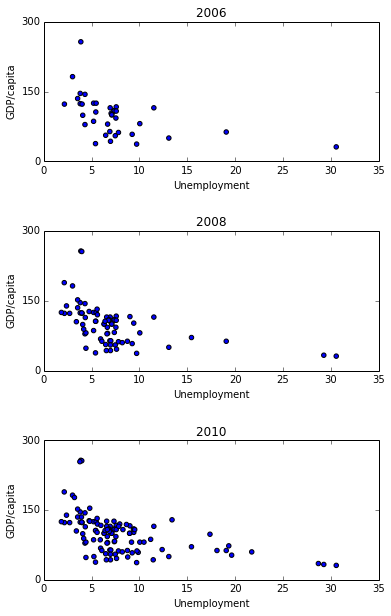

In [238]:
years = ['%s ' % year for year in [2006,2008,2010]]
x,y = [],[]
fig, ax = plt.subplots(len(years))
fig.subplots_adjust(hspace=.5)
fig.set_figheight(10)
i = 0
for year in years:
    for country in union:
        x.append(udf[udf.index == country][year].mean())
        y.append(gdf[gdf.index == country][year].mean())
    ax[i].scatter(x,y)
    ax[i].set_title(year)
    ax[i].set_yticks([0,150,300])
    ax[i].set_xlabel('Unemployment')
    ax[i].set_ylabel('GDP/capita')
    i+=1

With these plots it is easy to see that you can not have high GDP and high unemployment. Interestingly it also seems that you can't have low unemployment and low GDP either.

An interesting further investigation would be to measure those barriers and more so to see if they change from year to year.

The best narrative available here I believe would be to talk of these parameters before and after the global financial crisis. If I were to measure those barriers I mentioned before, for each year, it would be interesting to compare them to minimum/average/median salary in the countries, but those graphs were almost all strictly increasing. This would make a relation between four fundamental parameters; GDP, unemployment, salary and time.